<a href="https://colab.research.google.com/github/nishu-mns/ML-Labs/blob/main/ML_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn import svm


In [2]:
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


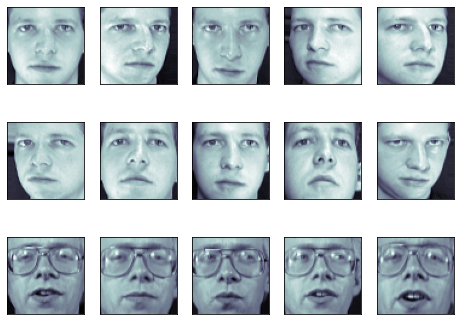

In [3]:
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  print(faces.images[i].shape)
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [5]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred = gnb.predict(X_test)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test, y_pred ), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')
 

(0.78, 0.78, 0.78, 0.78)

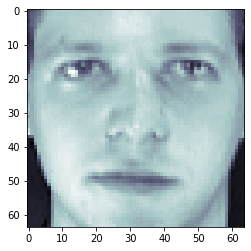

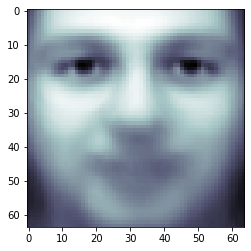

In [6]:
plt.imshow(faces.images[0],cmap=plt.cm.bone)
plt.show()

pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

plt.imshow(pca.mean_.reshape(faces.images[1].shape),cmap=plt.cm.bone)

In [7]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


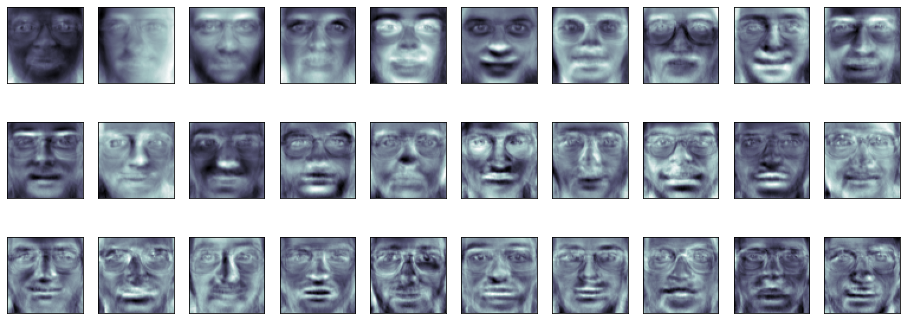

In [8]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),

cmap=plt.cm.bone)

In [9]:
print(X_test_pca.shape) 

(100, 150)


In [10]:
gnb1 = GaussianNB()
gnb1.fit(X_train_pca,y_train)

y_pred = gnb1.predict(X_test_pca)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test, y_pred ), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')
 

(0.8, 0.8, 0.8, 0.8000000000000002)

In [11]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80         2
           3       0.10      1.00      0.18         1
           4       1.00      1.00      1.00         1
           5       1.00      0.60      0.75         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         4
          11       0.33      1.00      0.50         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [12]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [13]:
simultaneos = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),('gnb', GaussianNB())])
simultaneos.fit(X_train, y_train)
y_pred = simultaneos.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test, y_pred ), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')
     

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


(0.79, 0.79, 0.79, 0.79)

In [14]:
X,y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [15]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test, y_pred ), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')
     

(1.0, 1.0, 1.0, 1.0)

In [16]:
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_train)

pca.components_

array([[ 0.37649644, -0.06637905,  0.85134571,  0.35924188],
       [ 0.6240207 ,  0.75538031, -0.18479376, -0.07648543]])

In [20]:
model_p = Pipeline([('pca', decomposition.PCA(n_components=6, whiten=True)),('gnb', GaussianNB())])
model_p.fit(X_train,y_train)
y_pred = model_p.predict(X_test)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test, y_pred ), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')

(0.65, 0.65, 0.65, 0.65)

In [21]:
model_p = Pipeline([('pca', decomposition.PCA(n_components=9, whiten=True)),('gnb', tree.DecisionTreeClassifier())])
model_p.fit(X_train,y_train)
y_pred = model_p.predict(X_test)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test, y_pred ), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')
    

(0.46, 0.46, 0.46, 0.46)

In [22]:
model_p = Pipeline([('pca', decomposition.PCA(n_components=9, whiten=True)),('gnb', svm.SVC(C=2,kernel='rbf'))])
model_p.fit(X_train,y_train)
y_pred = model_p.predict(X_test)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test, y_pred ), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')
     

(0.85, 0.85, 0.85, 0.85)